# Configuration 3, lowest dune growth rate

In [1]:
import os, copy, time
from matplotlib import pyplot as plt
from cascade.cascade import Cascade
import numpy as np
from cascade.tools import outwash_plotters as out_plt
from cascade.tools import plotters as cascade_plt

In [2]:
ki = 8.75E-3
C = 0.0134
beach_slope = 0.002
save_dir = "C:/Users/Lexi/Documents/Research/Outwasher Paper/run_output/avgs/low_dune_growth/"

# B3D Only: Outwash module set to false

In [10]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_b3d_only = Cascade(
    datadir, 
    name="config3_b3d_startyr1_interval20yrs",  
    elevation_file="NCB-default-elevation-config3-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-config3-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=False,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=beach_slope,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.05,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_startyr_1_interval_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach-config3-damMHW.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 100,
    ki_value=ki,
    c=C,
)

In [11]:
t0 = time.time()

for time_step in range(cascade_b3d_only._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step+1, end="")
    cascade_b3d_only.update()
    if cascade_b3d_only.b3d_break:
        break
        
        
t1 = time.time()
t_total_seconds = t1-t0
t_total_minutes = t_total_seconds/60
t_total_hours = t_total_seconds/3600

 Time Step:  100

In [12]:
print(round(t_total_minutes))
print(round(t_total_hours,1))

37
0.6


In [13]:
# save variables
cascade_b3d_only.save(save_dir)

Text(0, 0.5, 'shoreline position')

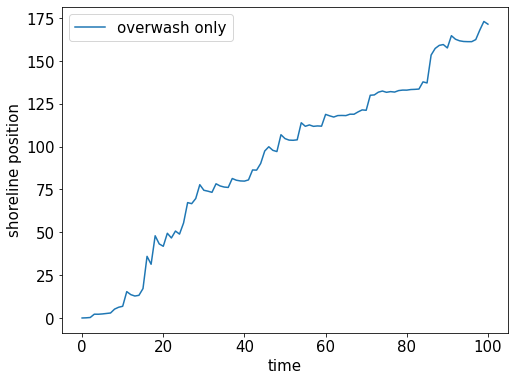

In [14]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

m_xsTS = np.subtract(cascade_b3d_only.barrier3d[0].x_s_TS, cascade_b3d_only.barrier3d[0].x_s_TS[0])
m_xsTS = np.multiply(m_xsTS,10)

plt.plot(m_xsTS, label="overwash only")
plt.legend()
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.savefig(newpath + "shoreline_position", facecolor='w')

# 100% to shoreface

In [15]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash100 = Cascade(
    datadir, 
    name="config3_outwash100_startyr1_interval20yrs",  
    elevation_file="NCB-default-elevation-config3-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-config3-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=beach_slope,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.05,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_startyr_1_interval_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach-config3-damMHW.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 100,
    ki_value=ki,
    c=C,
)

In [16]:
t0 = time.time()

for time_step in range(cascade_outwash100._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    # Lexi added the +1 to print screen so the output should equal the time_index in each model
    print("\r", "Time Step: ", time_step+1, end="")
    cascade_outwash100.update()
    if cascade_outwash100.b3d_break:
        break
        

t1 = time.time()
t_total_seconds = t1-t0
t_total_minutes = t_total_seconds/60
t_total_hours = t_total_seconds/3600

 Outwasher Time Step:  514

 Time Step:  3e Step:  12099 10156 10811 10999 Outwasher Time Step:  11405

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  100Step:  12099589513 10083 10672 10752 Outwasher Time Step:  10770 Outwasher Time Step:  11059 1120711738 11788118541198411272 Outwasher Time Step:  11448 11722 11998 926 6995 92579314 11100 11971

In [17]:
print(round(t_total_minutes))
print(round(t_total_hours,1))

324
5.4


In [18]:
# save variables
cascade_outwash100.save(save_dir)

Text(0, 0.5, 'shoreline position')

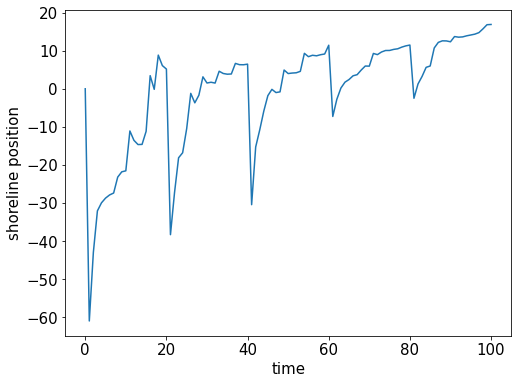

In [19]:
m_xsTS_100 = np.subtract(cascade_outwash100.barrier3d[0].x_s_TS, cascade_outwash100.barrier3d[0].x_s_TS[0])
m_xsTS_100 = np.multiply(m_xsTS_100,10)

plt.plot(m_xsTS_100)
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")


Text(0.5, 1.0, 'Outwash to Shoreface')

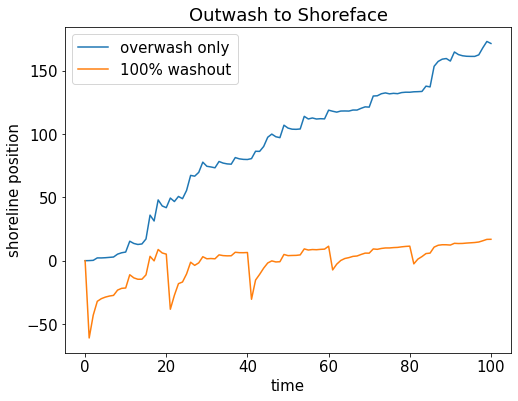

In [20]:
plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.ylim([500, 580])
plt.legend()
plt.title("Outwash to Shoreface")

[0, 61.09697418855916, 43.0857588456783, 32.163459410593305, 30.055167990542202, 28.818826026435147, 27.982528460395315, 27.477403205465123, 23.299810559934997, 21.90907720013115, 21.643536567842148, 11.172205157571682, 13.63410128263979, 14.742329947482347, 14.704814092610832, 11.273865069320834, 0, 3.5933971963106615, 0, 2.74929328144367, 3.6620359889664655, 47.17639229823476, 36.14779569587995, 26.978038407063707, 25.654783358399982, 19.292011923798498, 10.047680049922576, 12.53360364724017, 10.539541302835573, 5.703961367343879, 7.327359139750058, 7.128283652471907, 7.345586537979045, 4.233458460096244, 4.824730727994222, 5.01387120503523, 4.956868402406371, 2.1767569052875047, 2.5132360038375623, 2.5311992517379167, 2.3751359544633033, 39.29593392082097, 24.13583664706522, 19.638134279182395, 14.70547507088952, 10.647779051503505, 8.995110339763812, 9.838517639187785, 9.653771193952423, 3.915146165201975, 4.841264568740087, 4.711462954727779, 4.640181649898523, 4.264131581059871, 

Text(0, 0.5, 'beach width')

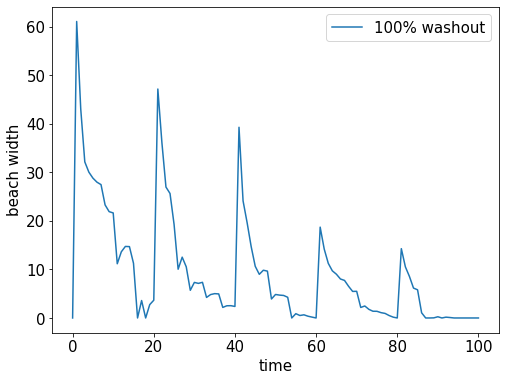

In [21]:
beach_width_100 = cascade_outwash100.outwash[0]._beach_width
print(beach_width_100)

plt.plot(beach_width_100, label="100% washout")
plt.legend()
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("beach width")

# 50% Outwash to shoreface

In [3]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash50 = Cascade(
    datadir, 
    name="config3_outwash50_startyr1_interval20yrs",  
    elevation_file="NCB-default-elevation-config3-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-config3-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=beach_slope,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.05,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_startyr_1_interval_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=50,
    outwash_beach_file = "NCB-default-beach-config3-damMHW.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 100,
    ki_value=ki,
    c=C,
)

In [4]:
t0 = time.time()

for time_step in range(cascade_outwash50._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step+1, end="")
    cascade_outwash50.update()
    if cascade_outwash50.b3d_break:
        break
        
t1 = time.time()
t_total_seconds = t1-t0
t_total_minutes = t_total_seconds/60
t_total_hours = t_total_seconds/3600

 Time Step:  1
 start outwash storm


KeyboardInterrupt: 

In [ ]:
print(round(t_total_minutes))
print(round(t_total_hours,1))

In [ ]:
# save variables
cascade_outwash50.save(save_dir)

In [ ]:
m_xsTS_50 = np.subtract(cascade_outwash50.barrier3d[0].x_s_TS, cascade_outwash50.barrier3d[0].x_s_TS[0])
m_xsTS_50 = np.multiply(m_xsTS_50,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

In [ ]:
beach_width_50 = cascade_outwash50.outwash[0]._beach_width
# print(beach_width_100)

plt.plot(beach_width_100, label="100% washout")
plt.plot(beach_width_50, label="50% washout")

# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("beach width")
plt.legend()

# washout lost

In [ ]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash0 = Cascade(
    datadir, 
    name="config3_outwash0_startyr1_interval20yrs",  
    elevation_file="NCB-default-elevation-config3-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-config3-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=beach_slope,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.05,
    max_dune_growth_rate=0.45,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_startyr_1_interval_20yrs.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=0,
    outwash_beach_file = "NCB-default-beach-config3-damMHW.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 100,
    ki_value=ki,
    c=C,
)

In [ ]:
t0 = time.time()

for time_step in range(cascade_outwash0._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step+1, end="")
    cascade_outwash0.update()
    if cascade_outwash0.b3d_break:
        break
        
t1 = time.time()
t_total_seconds = t1-t0
t_total_minutes = t_total_seconds/60
t_total_hours = t_total_seconds/3600

In [ ]:
print(round(t_total_minutes))
print(round(t_total_hours,1))

In [ ]:
# save variables
cascade_outwash0.save(save_dir)

In [ ]:
beach_width_0 = cascade_outwash0.outwash[0]._beach_width

plt.plot(beach_width_100, label="100% washout")
plt.plot(beach_width_50, label="50% washout")
plt.plot(beach_width_0, label="0% washout")

# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("beach width")
plt.legend()

# plotting results

In [ ]:
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams.update({"font.size": 15})
ls="dashed"

## shoreline position

In [ ]:
m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
# plt.plot(m_xsTS_0, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreline Position (m)")


print(m_xsTS_100[1])
print(m_xsTS_50[1])


plt.ylim((-150, 250))

plt.vlines([1,21,41,61,81], -150, 250, colors="k", linestyles='dotted', label='outwash events')
plt.legend(loc="upper left")

# plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\shorepos_025.jpg")

print(m_xsTS_0[100])
print(m_xsTS[100])

In [ ]:
m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
plt.plot(m_xsTS_0, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreline Position (m)")
# plt.legend(loc="upper left")

print(m_xsTS_100[1])
print(m_xsTS_50[1])


plt.ylim((-150, 250))
# plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\shorepos_025.jpg")

print(m_xsTS_0[100])
print(m_xsTS[100])

plt.vlines([1,21,41,61,81], -150, 250, colors="k", linestyles='dotted', label='outwash events')
# plt.legend()

In [ ]:
# _ = cascade_plt.plot_ShorelinePositions(cascade_b3d_only.barrier3d[0].x_s_TS, cascade_b3d_only.barrier3d[0].x_b_TS)
# _ = cascade_plt.plot_ShorelinePositions(cascade_outwash100.barrier3d[0].x_s_TS, cascade_outwash100.barrier3d[0].x_b_TS)
# _ = cascade_plt.plot_ShorelinePositions(cascade_outwash50.barrier3d[0].x_s_TS, cascade_outwash50.barrier3d[0].x_b_TS)
# _ = cascade_plt.plot_ShorelinePositions(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_b_TS)

In [ ]:
#from importlib import reload
# reload(cascade_plt)
# time_step = np.arange(0,101,20)
# # print(time_step)
# _ = cascade_plt.plot_ModelTransects(cascade_b3d_only, time_step, 0)
# _ = cascade_plt.plot_ModelTransects(cascade_outwash100, [0,1,2,20,21,22], 0)
# _ = cascade_plt.plot_ModelTransects(cascade_outwash50, [0,1,20,40,60], 0)
# _ = cascade_plt.plot_ModelTransects(cascade_outwash0, time_step, 0) 

In [ ]:
reload(out_plt)

In [ ]:
ylim = (125, 225)
zlim = 6
zbot = -1

_ = out_plt.plot_ElevAnimation_CASCADE(
    cascade=cascade_b3d_only,
    directory="C:/Users/Lexi/Documents/Research/Thesis/r025/",
    TMAX_MGMT=[0],
    name="cascade_plt_b3d_only",
    TMAX_SIM=101,
    ny=1,
    beach_management_ny=None,  # list of bool the length of ny, or None for all False
    roadway_management_ny=None,
    y_lim=ylim,
    z_lim=zlim,
    z_bot=zbot,
    fig_size=None,
    fig_eps=False,
    km_on=True,
)

_ = out_plt.plot_ElevAnimation_CASCADE(
    cascade=cascade_outwash100,
    directory="C:/Users/Lexi/Documents/Research/Thesis/r025/",
    TMAX_MGMT=[0],
    name="cascade_plt_100out",
    TMAX_SIM=23,
    ny=1,
    beach_management_ny=None,  # list of bool the length of ny, or None for all False
    roadway_management_ny=None,
    y_lim=ylim,
    z_lim=zlim,
    z_bot=zbot,
    fig_size=None,
    fig_eps=False,
    km_on=True,
)

_ = out_plt.plot_ElevAnimation_CASCADE(
    cascade=cascade_outwash50,
    directory="C:/Users/Lexi/Documents/Research/Thesis/r025/",
    TMAX_MGMT=[0],
    name="cascade_plt_50out",
    TMAX_SIM=61,
    ny=1,
    beach_management_ny=None,  # list of bool the length of ny, or None for all False
    roadway_management_ny=None,
    y_lim=ylim,
    z_lim=zlim,
    z_bot=zbot,
    fig_size=None,
    fig_eps=False,
    km_on=True,
)

_ = out_plt.plot_ElevAnimation_CASCADE(
    cascade=cascade_outwash0,
    directory="C:/Users/Lexi/Documents/Research/Thesis/r025/",
    TMAX_MGMT=[0],
    name="cascade_plt_0out",
    TMAX_SIM=101,
    ny=1,
    beach_management_ny=None,  # list of bool the length of ny, or None for all False
    roadway_management_ny=None,
    y_lim=ylim,
    z_lim=zlim,
    z_bot=zbot,
    fig_size=None,
    fig_eps=False,
    km_on=True,
)

In [ ]:
# plt.rcParams['figure.figsize'] = (12,6)

# m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
# m_xsTS_0 = np.multiply(m_xsTS_0,10)

# plt.xlabel("time")
# plt.ylabel("shoreline position")

# plt.plot(m_xsTS, label="landward-directed flows")
# # plt.plot(m_xsTS_100, label="100% washout to shoreface", linestyle=ls)
# # plt.plot(m_xsTS_50, label="50% washout to shoreface", linestyle=ls)
# plt.plot(m_xsTS_0, label="landward- and seaward-directed flows", linestyle="solid")

# plt.xlabel("Year")
# plt.ylabel("Barrier Migration (m)")
# plt.legend()


## avg interior elevation

In [ ]:
hbTS = np.array(cascade_b3d_only.barrier3d[0].h_b_TS)*10
hbTS2 = np.array(cascade_outwash100.barrier3d[0].h_b_TS)*10
hbTS3 = np.array(cascade_outwash50.barrier3d[0].h_b_TS)*10
hbTS4 = np.array(cascade_outwash0.barrier3d[0].h_b_TS)*10

# plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

plt.plot(hbTS, label="overwash only")
plt.plot(hbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(hbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(hbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Interior Elevation (m MHW)")
plt.legend(loc="upper left")
# plt.title("Avg Interior Elevation (m)")

plt.ylim(top=3.25)
# plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\avg_int_025.jpg")

## avg barrier width 

In [ ]:
xbTS = np.array(cascade_b3d_only.barrier3d[0].x_b_TS)*10
xbTS2 = np.array(cascade_outwash100.barrier3d[0].x_b_TS)*10
xbTS3 = np.array(cascade_outwash50.barrier3d[0].x_b_TS)*10
xbTS4 = np.array(cascade_outwash0.barrier3d[0].x_b_TS)*10

plt.rcParams.update({"font.size": 15})

plt.plot(xbTS, label="overwash only")
plt.plot(xbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(xbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(xbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Barrier Width (m)")
# plt.legend()

plt.ylim((1500, 2050))

# plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\avg_width_025.jpg")

In [ ]:
xbTS = np.array(cascade_b3d_only.barrier3d[0].x_b_TS)*10
xbTS2 = np.array(cascade_outwash100.barrier3d[0].x_b_TS)*10
xbTS3 = np.array(cascade_outwash50.barrier3d[0].x_b_TS)*10
xbTS4 = np.array(cascade_outwash0.barrier3d[0].x_b_TS)*10

plt.rcParams.update({"font.size": 15})

plt.plot(xbTS, label="overwash only")
plt.plot(xbTS2, label="100% washout to shoreface", linestyle=ls)
# plt.plot(xbTS3, label="50% washout to shoreface", linestyle=ls)
# plt.plot(xbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Back Bay position (m)")


plt.ylim((1500, 2050))
plt.vlines([1,21,41,61,81], 1500, 2050, colors="k", linestyles='dotted', label='outwash events')

# plt.legend()

In [ ]:
xbTS = np.array(cascade_b3d_only.barrier3d[0].InteriorWidth_AvgTS)*10
xbTS2 = np.array(cascade_outwash100.barrier3d[0].InteriorWidth_AvgTS)*10
xbTS3 = np.array(cascade_outwash50.barrier3d[0].InteriorWidth_AvgTS)*10
xbTS4 = np.array(cascade_outwash0.barrier3d[0].InteriorWidth_AvgTS)*10

plt.rcParams.update({"font.size": 15})

plt.plot(xbTS, label="overwash only")
plt.plot(xbTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(xbTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(xbTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Avg Interior Barrier Width (m)")


plt.ylim(-5, 300)
# plt.vlines([1,21,41,61,81], -5 ,300, colors="k", linestyles='dotted', label='outwash events')

# plt.legend()

## overwash flux

In [ ]:
OWTS = cascade_b3d_only.barrier3d[0].QowTS #m3/m
OWTS2 = cascade_outwash100.barrier3d[0].QowTS #m3/m
OWTS3 = cascade_outwash50.barrier3d[0].QowTS #m3/m
OWTS4 = cascade_outwash0.barrier3d[0].QowTS #m3/m

plt.rcParams['figure.figsize'] = (9,6)

plt.plot(OWTS, label="overwash only")
plt.plot(OWTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(OWTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(OWTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")
# plt.legend()
# plt.title("Overwash")

plt.ylim(top=260)
plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\overwash_025.jpg")

In [ ]:
OWTS = cascade_b3d_only.barrier3d[0].QowTS #m3/m
OWTS2 = cascade_outwash100.barrier3d[0].QowTS #m3/m
OWTS3 = cascade_outwash50.barrier3d[0].QowTS #m3/m
OWTS4 = cascade_outwash0.barrier3d[0].QowTS #m3/m

plt.rcParams['figure.figsize'] = (9,6)

plt.plot(OWTS, label="overwash only")
plt.plot(OWTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(OWTS3, label="50% washout to shoreface", linestyle=ls)
# plt.plot(OWTS4, label="0% washout to shoreface", linestyle=ls)
# 
plt.xlabel("Year")
plt.ylabel("Overwash Flux [$m^3/m$]")
# plt.legend()


plt.ylim(top=260)
plt.vlines([1,21,41,61,81], 0, 260, colors="k", linestyles='dotted', label='outwash events')

# plt.legend()
# plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\overwash_025.jpg")

## Outwash Volume

In [ ]:
# volTS = cascade_b3d_only.outwash[0]._outwash_TS #m3/m
# volTS2 = cascade_outwash100.outwash[0]._outwash_TS #m3/m
# volTS3 = cascade_outwash50.outwash[0]._outwash_TS #m3/m
# volTS4 = cascade_outwash0.outwash[0]._outwash_TS #m3/m

# plt.plot(volTS, label="overwash only")
# plt.plot(volTS2, label="100% washout to shoreface", linestyle=ls)
# plt.plot(volTS3, label="50% washout to shoreface", linestyle=ls)
# plt.plot(volTS4, label="0% washout to shoreface", linestyle=ls)

# plt.xlabel("Year")
# plt.ylabel("Outwash Volume [$m^3$]")
# # plt.legend(loc="upper right")

# # plt.title("Overwash")

## Outwash Flux

In [ ]:
fluxTS = cascade_b3d_only.outwash[0]._outwash_flux_TS #m3/m
fluxTS2 = cascade_outwash100.outwash[0]._outwash_flux_TS #m3/m
fluxTS3 = cascade_outwash50.outwash[0]._outwash_flux_TS #m3/m
fluxTS4 = cascade_outwash0.outwash[0]._outwash_flux_TS #m3/m

plt.plot(fluxTS, label="overwash only")
plt.plot(fluxTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(fluxTS3, label="50% washout to shoreface", linestyle=ls)
plt.plot(fluxTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Outwash Flux [$m^3/m$]")
# plt.legend(loc="upper right")
# plt.title("Overwash")

plt.ylim(top=800)
plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\outwash_025.jpg")

## shoreface slope

In [ ]:
sfTS = cascade_b3d_only.barrier3d[0].s_sf_TS 
sfTS2 = cascade_outwash100.barrier3d[0].s_sf_TS 
sfTS3 = cascade_outwash50.barrier3d[0].s_sf_TS 
sfTS4 = cascade_outwash0.barrier3d[0].s_sf_TS 

# plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams.update({"font.size": 15})

plt.plot(sfTS, label="overwash only")
plt.plot(sfTS2, label="100% washout to shoreface", linestyle=ls)
plt.plot(sfTS3, label="50% washout to shoreface", linestyle=ls)
# plt.plot(sfTS4, label="0% washout to shoreface", linestyle=ls)

plt.xlabel("Year")
plt.ylabel("Shoreface Slope")
# plt.legend()
# plt.title("Shoreface Slope")

plt.ylim((0.015, 0.0235))
plt.vlines([1,21,41,61,81], 0.015, 0.0235, colors="k", linestyles='dotted', label='outwash events')
# plt.legend()

# plt.savefig(r"C:\Users\Lexi\Documents\Research\Thesis\Paper Figs\shoreface_slope_025.jpg")

## Dunes

In [ ]:
TMAX=101
vmin=0
vmax=6


# Barrier3d only

b3d = cascade_b3d_only.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

duneFig = plt.figure(figsize=(20, 14))
plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(221)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("overwash only", weight="bold")
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)

xtick_max = np.shape(DuneCrest)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
plt.xticks(x_ticks, x_tick_labels)

# cascade 100%

b3d = cascade_outwash100.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(224)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("100% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
plt.hlines([1,21,41,61,81], -0.5, 49.5, colors="magenta", linestyles='solid')

# cascade 50%

b3d = cascade_outwash50.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(223)
cax = ax.matshow(
    np.flip((DuneCrest),1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("50% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
plt.hlines([1,21,41,61,81], -0.5, 49.5, colors="magenta", linestyles='solid')

# cascade 0%

b3d = cascade_outwash0.barrier3d
DuneCrest = []

for iB3D in range(len(b3d)):
    sub_domain = b3d[iB3D]._DuneDomain[0:TMAX, :, :]
    DuneCrest.append(sub_domain.max(axis=2))

DuneCrest = np.hstack(DuneCrest).astype(float)

plt.rcParams.update({"font.size": 15})
ax = duneFig.add_subplot(222)
cax = ax.matshow(
    np.flip(DuneCrest,1) * 10,
    origin="lower",
    cmap="bwr",
    aspect="auto",
    vmin=vmin,
    vmax=vmax,
)
ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
# cax = ax.xaxis.set_ticks_position("bottom")  # analysis:ignore
cbar = duneFig.colorbar(cax)
cbar.set_label('Dune Height Above Berm Elevation (m)', rotation=270, labelpad=25)
plt.xlabel("Alongshore Distance (m)")
plt.ylabel("Year")
plt.title("0% washout to shoreface", weight="bold")
plt.xticks(x_ticks, x_tick_labels)
plt.hlines([1,21,41,61,81], -0.5, 49.5, colors="magenta", linestyles='solid')
# plt.hlines(20, -0.5, 49.5, color="k", linestyles='dashed', linewidth=1)


plt.subplots_adjust(hspace=0.3, wspace=0.1)

# Elevation Plots

In [ ]:
# domain 0
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[0]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[0] 
domain0 = np.vstack([dunes, interior])

# domain 1
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[1]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[1] 
domain1 = np.vstack([dunes, interior])

# domain 20
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[20]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes, interior])

# domain 21
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[21]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[21]
domain21 = np.vstack([dunes, interior])

# domain 40
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[60]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[60] 
domain40 = np.vstack([dunes, interior])

# domain 41
dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[61]) + cascade_b3d_only.barrier3d[0].BermEl
interior = cascade_b3d_only.barrier3d[0]._DomainTS[61] 
domain41 = np.vstack([dunes, interior])

In [ ]:
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams.update({"font.size": 20})

shrink=0.5

fig1 = plt.figure()
fig1.tight_layout()
fig1.suptitle('Overwash Only', weight="bold")
ax1 = fig1.add_subplot(161)
mat = ax1.matshow(
    np.flip(domain0)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax1.set_title("initial domain")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain0)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain0)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax2 = fig1.add_subplot(162)
mat = ax2.matshow(
    np.flip(domain1)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax2.set_title("year 1")
ax2.set_ylabel("barrier width (m)")
ax2.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain1)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain1)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# ax2.tick_params(left=False)
# ax2.set(yticklabels=[])
# fig2.subplots_adjust(wspace=0.3, hspace=0)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(163)
mat = ax3.matshow(
    np.flip(domain20)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 20")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain20)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain20)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(164)
mat = ax3.matshow(
    np.flip(domain21)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 21")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain21)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain21)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(165)
mat = ax3.matshow(
    np.flip(domain40)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 60")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain40)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain40)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(166)
mat = ax3.matshow(
    np.flip(domain41)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 61")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain41)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain41)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)
fig1.subplots_adjust(top=1.15, wspace=0.3)

In [ ]:
# domain 0
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[0]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[0] 
domain0 = np.vstack([dunes, interior])

# domain 1
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[1]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[1] 
domain1 = np.vstack([dunes, interior])

# domain 20
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[20]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes, interior])

# domain 21
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[21]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[21] 
domain21 = np.vstack([dunes, interior])

# domain 40
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[60]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[60] 
domain40 = np.vstack([dunes, interior])

# domain 41
dunes = np.transpose(cascade_outwash0.barrier3d[0]._DuneDomain[61]) + cascade_outwash0.barrier3d[0].BermEl
interior = cascade_outwash0.barrier3d[0]._DomainTS[61] 
domain41 = np.vstack([dunes, interior])

In [ ]:
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams.update({"font.size": 20})

shrink=0.5

fig1 = plt.figure()
fig1.tight_layout()
fig1.suptitle('0% Washout to Shoreface', weight="bold")
ax1 = fig1.add_subplot(161)
mat = ax1.matshow(
    np.flip(domain0)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax1.set_title("initial domain")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain0)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain0)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax2 = fig1.add_subplot(162)
mat = ax2.matshow(
    np.flip(domain1)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax2.set_title("year 1")
ax2.set_ylabel("barrier width (m)")
ax2.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain1)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain1)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# ax2.tick_params(left=False)
# ax2.set(yticklabels=[])
# fig2.subplots_adjust(wspace=0.3, hspace=0)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(163)
mat = ax3.matshow(
    np.flip(domain20)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 20")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain20)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain20)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(164)
mat = ax3.matshow(
    np.flip(domain21)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 21")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain21)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain21)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(165)
mat = ax3.matshow(
    np.flip(domain40)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 60")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain40)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain40)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(166)
mat = ax3.matshow(
    np.flip(domain41)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 61")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain41)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain41)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)
fig1.subplots_adjust(top=1.15, wspace=0.3)

In [ ]:
# domain 0
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[0]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[0] 
domain0 = np.vstack([dunes, interior])

# domain 1
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[1]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[1] 
domain1 = np.vstack([dunes, interior])

# domain 20
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[20]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes, interior])

# domain 21
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[21]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[21] 
domain21 = np.vstack([dunes, interior])

# domain 40
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[60]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[60] 
domain40 = np.vstack([dunes, interior])

# domain 41
dunes = np.transpose(cascade_outwash50.barrier3d[0]._DuneDomain[61]) + cascade_outwash50.barrier3d[0].BermEl
interior = cascade_outwash50.barrier3d[0]._DomainTS[61] 
domain41 = np.vstack([dunes, interior])

In [ ]:
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams.update({"font.size": 20})

shrink=0.5

fig1 = plt.figure()
fig1.tight_layout()
fig1.suptitle('50% Washout to Shoreface', weight="bold")
ax1 = fig1.add_subplot(161)
mat = ax1.matshow(
    np.flip(domain0)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax1.set_title("initial domain")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain0)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain0)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax2 = fig1.add_subplot(162)
mat = ax2.matshow(
    np.flip(domain1)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax2.set_title("year 1")
ax2.set_ylabel("barrier width (m)")
ax2.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain1)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain1)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# ax2.tick_params(left=False)
# ax2.set(yticklabels=[])
# fig2.subplots_adjust(wspace=0.3, hspace=0)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(163)
mat = ax3.matshow(
    np.flip(domain20)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 20")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain20)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain20)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(164)
mat = ax3.matshow(
    np.flip(domain21)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 21")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain21)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain21)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(165)
mat = ax3.matshow(
    np.flip(domain40)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 60")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain40)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain40)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(166)
mat = ax3.matshow(
    np.flip(domain41)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 61")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain41)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain41)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)
fig1.subplots_adjust(top=1.15, wspace=0.3)

In [ ]:
# domain 0
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[0]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[0] 
domain0 = np.vstack([dunes, interior])

# domain 1
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[1]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[1] 
domain1 = np.vstack([dunes, interior])

# domain 20
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[20]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[20] 
domain20 = np.vstack([dunes, interior])

# domain 21
dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[21]) + cascade_outwash100.barrier3d[0].BermEl
interior = cascade_outwash100.barrier3d[0]._DomainTS[21] 
domain21 = np.vstack([dunes, interior])

# # domain 40
# dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[40]) + cascade_outwash100.barrier3d[0].BermEl
# interior = cascade_outwash100.barrier3d[0]._DomainTS[40] 
# domain40 = np.vstack([dunes, interior])

# # domain 41
# dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[41]) + cascade_outwash100.barrier3d[0].BermEl
# interior = cascade_outwash100.barrier3d[0]._DomainTS[41] 
# domain41 = np.vstack([dunes, interior])

In [ ]:
plt.rcParams['figure.figsize'] = (50,10)
plt.rcParams.update({"font.size": 20})

shrink=0.5

fig1 = plt.figure()
fig1.tight_layout()
fig1.suptitle('100% Washout to Shoreface', weight="bold")
ax1 = fig1.add_subplot(161)
mat = ax1.matshow(
    np.flip(domain0)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax1.set_title("initial domain")
ax1.set_ylabel("barrier width (m)")
ax1.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain0)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain0)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


ax2 = fig1.add_subplot(162)
mat = ax2.matshow(
    np.flip(domain1)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)
cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax2.set_title("year 1")
ax2.set_ylabel("barrier width (m)")
ax2.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain1)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain1)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)
# ax2.tick_params(left=False)
# ax2.set(yticklabels=[])
# fig2.subplots_adjust(wspace=0.3, hspace=0)

# fig3 = plt.figure()
ax3 = fig1.add_subplot(163)
mat = ax3.matshow(
    np.flip(domain20)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 20")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain20)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain20)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)


# fig3 = plt.figure()
ax3 = fig1.add_subplot(164)
mat = ax3.matshow(
    np.flip(domain21)*10,
    cmap="terrain",
    vmin=-3.0,
    vmax=6.0,
)

cbar = fig1.colorbar(mat, shrink=shrink)
cbar.set_label('m MHW', rotation=270, labelpad=5)
ax3.set_title("year 21")
ax3.set_ylabel("barrier width (m)")
ax3.set_xlabel("barrier length (m)")
plt.gca().xaxis.tick_bottom()
xtick_max = np.shape(domain21)[1]  # n_cols = x
x_ticks = np.array(range(0, xtick_max, 10))
x_tick_labels = x_ticks * 10
ytick_max = np.shape(domain21)[0]  # n_rows = y
y_ticks = np.array(range(0, ytick_max, 10))
y_tick_labels = y_ticks * 10
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(y_ticks, y_tick_labels)

# # fig3 = plt.figure()
# ax3 = fig1.add_subplot(165)
# mat = ax3.matshow(
#     np.flip(domain21)*10,
#     cmap="terrain",
#     vmin=-3.0,
#     vmax=6.0,
# )

# cbar = fig1.colorbar(mat, shrink=shrink)
# cbar.set_label('m MHW', rotation=270, labelpad=5)
# ax3.set_title("year 22")
# ax3.set_ylabel("barrier width (m)")
# ax3.set_xlabel("barrier length (m)")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(domain21)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(domain21)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)

# # fig3 = plt.figure()
# ax3 = fig1.add_subplot(166)
# mat = ax3.matshow(
#     np.flip(domain21)*10,
#     cmap="terrain",
#     vmin=-3.0,
#     vmax=6.0,
# )

# cbar = fig1.colorbar(mat, shrink=shrink)
# cbar.set_label('m MHW', rotation=270, labelpad=5)
# ax3.set_title("year 22")
# ax3.set_ylabel("barrier width (m)")
# ax3.set_xlabel("barrier length (m)")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(domain21)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(domain21)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)


# # fig3 = plt.figure()
# ax3 = fig1.add_subplot(165)
# mat = ax3.matshow(
#     np.flip(domain40)*10,
#     cmap="terrain",
#     vmin=-3.0,
#     vmax=6.0,
# )

# cbar = fig1.colorbar(mat, shrink=shrink)
# cbar.set_label('meters', rotation=270, labelpad=5)
# ax3.set_title("year 40")
# ax3.set_ylabel("barrier width (m)")
# ax3.set_xlabel("barrier length (m)")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(domain40)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(domain40)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)

# # fig3 = plt.figure()
# ax3 = fig1.add_subplot(166)
# mat = ax3.matshow(
#     np.flip(domain41)*10,
#     cmap="terrain",
#     vmin=-3.0,
#     vmax=6.0,
# )

# cbar = fig1.colorbar(mat, shrink=shrink)
# cbar.set_label('meters', rotation=270, labelpad=5)
# ax3.set_title("year 41")
# ax3.set_ylabel("barrier width (m)")
# ax3.set_xlabel("barrier length (m)")
# plt.gca().xaxis.tick_bottom()
# xtick_max = np.shape(domain41)[1]  # n_cols = x
# x_ticks = np.array(range(0, xtick_max, 10))
# x_tick_labels = x_ticks * 10
# ytick_max = np.shape(domain41)[0]  # n_rows = y
# y_ticks = np.array(range(0, ytick_max, 10))
# y_tick_labels = y_ticks * 10
# plt.xticks(x_ticks, x_tick_labels)
# plt.yticks(y_ticks, y_tick_labels)

# # fig1.subplots_adjust(top=1.15, wspace=0.3, hspace=0)
fig1.subplots_adjust(top=1.15, wspace=0.3)